In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def casos(df):
    return df["Casos "].tolist()

def concatDF(df1,df2):
    return  pd.concat([df1,df2],axis = 1, ignore_index = True, sort = True)

def get_nuevosCasos(casosTotales) :
    nuevosCasos = np.array([],dtype=int)
    casos = 0
    for elem in casosTotales:
            casos = elem - casos
            nuevosCasos = np.append(nuevosCasos,casos)
            casos = elem
    return nuevosCasos

def get_porcentaje(casosTotales):
    porcentaje = np.array([],dtype = float)
    casos = 0
    for elem in casosTotales:
        if(casos != 0):
            pct = (elem-casos)/casos*100
        else:
            pct = casos
        porcentaje = np.append(porcentaje,pct)
        casos = elem
    return porcentaje

def get_historico(casosTotales,nuevosCasos,porcentaje,altasTotales,nuevasAltas,altaspct):
    df1 = pd.DataFrame(casosTotales)
    df2 = pd.DataFrame(nuevosCasos)
    df3 = pd.DataFrame(porcentaje)
    df4 = pd.DataFrame(altasTotales)
    df5 = pd.DataFrame(nuevasAltas)
    df6 = pd.DataFrame(altaspct)
    historico = concatDF(df1,concatDF(df2,concatDF(df3,concatDF(df4,concatDF(df5,df6)))))
    historico.columns = ['Casos Totales','Casos diarios','porcentaje','Altas Totales','Altas diarios','porcentaje']
    return historico

pd.options.display.max_rows = None

In [2]:
world = pd.read_csv("https://opendata.ecdc.europa.eu/covid19/casedistribution/csv", encoding= 'unicode_escape')

In [3]:
world = world.set_index("countriesAndTerritories")

In [4]:
italy = world.loc['Italy'].copy()
italyCases = np.array(italy["cases"])
italyCases = np.sort(italyCases)

spain = world.loc['Spain'].copy()
spainCases = np.array(spain["cases"])
spainCases = np.sort(spainCases)

usa = world.loc['United_States_of_America'].copy()
usaCases = np.array(usa["cases"])
usaCases = np.sort(usaCases)

df1 = pd.DataFrame(italyCases)
df2 = pd.DataFrame(spainCases)
df3 = pd.DataFrame(usaCases)

comparativa = concatDF(df1,(concatDF(df2,df3)))
comparativa.columns = ['Italy', 'Spain', 'USA']

ItalySpain = concatDF(df1,df2)
ItalySpain.columns = ['Italy', 'Spain']


# Spain vs. Italy 
##### (NO FIABLE. La fuente no actualiza bien los datos)

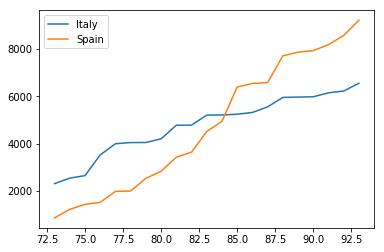

In [5]:
ItalySpain.tail(21).plot()

# Spain vs. Italy vs. USA
##### ( NO FIABLE. La fuente no acrualiza bien los datos)

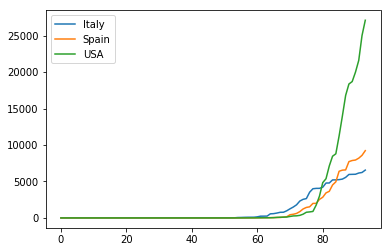

In [6]:
comparativa.plot()

In [7]:
CovidData = pd.read_csv("https://covid19.isciii.es/resources/serie_historica_acumulados.csv", encoding= 'unicode_escape')
CovidData = CovidData.fillna(0)
CovidData = CovidData.set_index("CCAA Codigo ISO")

In [8]:
andalucia = CovidData.loc['AN'].copy()
andalucia = andalucia.reset_index()
aragon = CovidData.loc['AR'].copy()
aragon = aragon.reset_index()
asturias = CovidData.loc['AS'].copy()
asturias = asturias.reset_index()
canarias = CovidData.loc['CN'].copy()
canarias = canarias.reset_index()
cantabira = CovidData.loc['CB'].copy()
cantabira = cantabira.reset_index()
castillaMancha = CovidData.loc['CM'].copy()
castillaMancha = castillaMancha.reset_index()
castillaLeon = CovidData.loc['CL'].copy()
castillaLeon = castillaLeon.reset_index()
cataluna = CovidData.loc['CT'].copy()
cataluna = cataluna.reset_index()
extremadura = CovidData.loc['EX'].copy()
extremadura = extremadura.reset_index()
galicia = CovidData.loc['GA'].copy()
galicia = galicia.reset_index()
baleares = CovidData.loc['IB'].copy()
baleares = baleares.reset_index()
rioja = CovidData.loc['RI'].copy()
rioja = rioja.reset_index()
madrid = CovidData.loc['MD'].copy()
madrid = madrid.reset_index()
murcia = CovidData.loc['MC'].copy()
murcia = murcia.reset_index()
navarra = CovidData.loc['NC'].copy()
navarra = navarra.reset_index()
paisVasco = CovidData.loc['PV'].copy()
paisVasco = paisVasco.reset_index()
valencia = CovidData.loc['VC'].copy()
valencia = valencia.reset_index()
ceuta = CovidData.loc['CE'].copy()
ceuta = ceuta.reset_index()
melilla = CovidData.loc['ME'].copy()
melilla = melilla.reset_index()

In [9]:
anCasos = np.array(andalucia["Casos "], dtype = int)
anRecuperados = np.array(andalucia["Recuperados"], dtype = int)
anRecNew = get_nuevosCasos(anRecuperados)
annew = get_nuevosCasos(anCasos)
anpct = get_porcentaje(anCasos)
anRecpct = get_porcentaje(anRecuperados)
anhistorico = get_historico(anCasos,annew,anpct,anRecuperados,anRecNew,anRecpct)

arCasos = np.array(aragon["Casos "], dtype = int)
arRecuperados = np.array(aragon["Recuperados"], dtype = int)
arRecNew = get_nuevosCasos(arRecuperados)
arnew = get_nuevosCasos(arCasos)
arpct = get_porcentaje(arCasos)
arRecpct = get_porcentaje(arRecuperados)
arhistorico = get_historico(arCasos,arnew,arpct,arRecuperados,arRecNew,arRecpct)

asCasos = np.array(asturias["Casos "], dtype = int)
asRecuperados = np.array(asturias["Recuperados"], dtype = int)
asRecNew = get_nuevosCasos(asRecuperados)
asnew = get_nuevosCasos(asCasos)
aspct = get_porcentaje(asCasos)
asRecpct = get_porcentaje(asRecuperados)
ashistorico = get_historico(asCasos,asnew,aspct,asRecuperados,asRecNew,asRecpct)

cnCasos = np.array(canarias["Casos "], dtype = int)
cnRecuperados = np.array(canarias["Recuperados"], dtype = int)
cnRecNew = get_nuevosCasos(cnRecuperados)
cnnew = get_nuevosCasos(cnCasos)
cnpct = get_porcentaje(cnCasos)
cnRecpct = get_porcentaje(cnRecuperados)
cnhistorico = get_historico(cnCasos,cnnew,cnpct,cnRecuperados,cnRecNew,cnRecpct)

cbCasos = np.array(cantabira["Casos "], dtype = int)
cbRecuperados = np.array(cantabira["Recuperados"], dtype = int)
cbRecNew = get_nuevosCasos(cbRecuperados)
cbnew = get_nuevosCasos(cbCasos)
cbpct = get_porcentaje(cbCasos)
cbRecpct = get_porcentaje(cbRecuperados)
cbhistorico = get_historico(cbCasos,cbnew,cbpct,cbRecuperados,cbRecNew,cbRecpct)

cmCasos = np.array(castillaMancha["Casos "], dtype = int)
cmRecuperados = np.array(castillaMancha["Recuperados"], dtype = int)
cmRecNew = get_nuevosCasos(cmRecuperados)
cmnew = get_nuevosCasos(cmCasos)
cmpct = get_porcentaje(cmCasos)
cmRecpct = get_porcentaje(cmRecuperados)
cmhistorico = get_historico(cmCasos,cmnew,cmpct,cmRecuperados,cmRecNew,cmRecpct)

clCasos = np.array(castillaLeon["Casos "], dtype = int)
clRecuperados = np.array(castillaLeon["Recuperados"], dtype = int)
clRecNew = get_nuevosCasos(clRecuperados)
clnew = get_nuevosCasos(clCasos)
clpct = get_porcentaje(clCasos)
clRecpct = get_porcentaje(clRecuperados)
clhistorico = get_historico(clCasos,clnew,clpct,clRecuperados,clRecNew,clRecpct)

ctCasos = np.array(cataluna["Casos "], dtype = int)
ctRecuperados = np.array(cataluna["Recuperados"], dtype = int)
ctRecNew = get_nuevosCasos(ctRecuperados)
ctnew = get_nuevosCasos(ctCasos)
ctpct = get_porcentaje(ctCasos)
ctRecpct = get_porcentaje(ctRecuperados)
cthistorico = get_historico(ctCasos,ctnew,ctpct,ctRecuperados,ctRecNew,ctRecpct)

exCasos = np.array(extremadura["Casos "], dtype = int)
exRecuperados = np.array(extremadura["Recuperados"], dtype = int)
exRecNew = get_nuevosCasos(exRecuperados)
exnew = get_nuevosCasos(exCasos)
expct = get_porcentaje(exCasos)
exRecpct = get_porcentaje(exRecuperados)
exhistorico = get_historico(exCasos,exnew,expct,exRecuperados,exRecNew,exRecpct)

gaCasos = np.array(galicia["Casos "], dtype = int)
gaRecuperados = np.array(galicia["Recuperados"], dtype = int)
gaRecNew = get_nuevosCasos(gaRecuperados)
ganew = get_nuevosCasos(gaCasos)
gapct = get_porcentaje(gaCasos)
gaRecpct = get_porcentaje(gaRecuperados)
gahistorico = get_historico(gaCasos,ganew,gapct,gaRecuperados,gaRecNew,gaRecpct)

ibCasos = np.array(baleares["Casos "], dtype = int)
ibRecuperados = np.array(baleares["Recuperados"], dtype = int)
ibRecNew = get_nuevosCasos(ibRecuperados)
ibnew = get_nuevosCasos(ibCasos)
ibpct = get_porcentaje(ibCasos)
ibRecpct = get_porcentaje(ibRecuperados)
ibhistorico = get_historico(ibCasos,ibnew,ibpct,ibRecuperados,ibRecNew,ibRecpct)

riCasos = np.array(rioja["Casos "], dtype = int)
riRecuperados = np.array(rioja["Recuperados"], dtype = int)
riRecNew = get_nuevosCasos(riRecuperados)
rinew = get_nuevosCasos(riCasos)
ripct = get_porcentaje(riCasos)
riRecpct = get_porcentaje(riRecuperados)
rihistorico = get_historico(riCasos,rinew,ripct,riRecuperados,riRecNew,riRecpct)

mdCasos = np.array(madrid["Casos "], dtype = int)
mdRecuperados = np.array(madrid["Recuperados"], dtype = int)
mdRecNew = get_nuevosCasos(mdRecuperados)
mdnew = get_nuevosCasos(mdCasos)
mdpct = get_porcentaje(mdCasos)
mdRecpct = get_porcentaje(mdRecuperados)
mdhistorico = get_historico(mdCasos,mdnew,mdpct,mdRecuperados,mdRecNew,mdRecpct)

mcCasos = np.array(murcia["Casos "], dtype = int)
mcRecuperados = np.array(murcia["Recuperados"], dtype = int)
mcRecNew = get_nuevosCasos(mcRecuperados)
mcnew = get_nuevosCasos(mcCasos)
mcpct = get_porcentaje(mcCasos)
mcRecpct = get_porcentaje(mcRecuperados)
mchistorico = get_historico(mcCasos,mcnew,mcpct,mcRecuperados,mcRecNew,mcRecpct)

ncCasos = np.array(navarra["Casos "], dtype = int)
ncRecuperados = np.array(navarra["Recuperados"], dtype = int)
ncRecNew = get_nuevosCasos(ncRecuperados)
ncnew = get_nuevosCasos(ncCasos)
ncpct = get_porcentaje(ncCasos)
ncRecpct = get_porcentaje(ncRecuperados)
nchistorico = get_historico(ncCasos,ncnew,ncpct,ncRecuperados,ncRecNew,ncRecpct)

pvCasos = np.array(paisVasco["Casos "], dtype = int)
pvRecuperados = np.array(paisVasco["Recuperados"], dtype = int)
pvRecNew = get_nuevosCasos(pvRecuperados)
pvnew = get_nuevosCasos(pvCasos)
pvpct = get_porcentaje(pvCasos)
pvRecpct = get_porcentaje(pvRecuperados)
pvhistorico = get_historico(pvCasos,pvnew,pvpct,pvRecuperados,pvRecNew,pvRecpct)

vcCasos = np.array(valencia["Casos "], dtype = int)
vcRecuperados = np.array(valencia["Recuperados"], dtype = int)
vcRecNew = get_nuevosCasos(vcRecuperados)
vcnew = get_nuevosCasos(vcCasos)
vcpct = get_porcentaje(vcCasos)
vcRecpct = get_porcentaje(vcRecuperados)
vchistorico = get_historico(vcCasos,vcnew,vcpct,vcRecuperados,vcRecNew,vcRecpct)

ceCasos = np.array(ceuta["Casos "], dtype = int)
ceRecuperados = np.array(ceuta["Recuperados"], dtype = int)
ceRecNew = get_nuevosCasos(ceRecuperados)
cenew = get_nuevosCasos(ceCasos)
cepct = get_porcentaje(ceCasos)
ceRecpct = get_porcentaje(ceRecuperados)
cehistorico = get_historico(ceCasos,cenew,cepct,ceRecuperados,ceRecNew,ceRecpct)

meCasos = np.array(melilla["Casos "], dtype = int)
meRecuperados = np.array(melilla["Recuperados"], dtype = int)
meRecNew = get_nuevosCasos(meRecuperados)
menew = get_nuevosCasos(meCasos)
mepct = get_porcentaje(meCasos)
meRecpct = get_porcentaje(meRecuperados)
mehistorico = get_historico(meCasos,menew,mepct,meRecuperados,meRecNew,meRecpct)

casosTotales = np.array(anCasos+arCasos+asCasos+cnCasos+cbCasos+cmCasos+clCasos+ctCasos+exCasos+gaCasos+ibCasos+riCasos+mdCasos+mcCasos+ncCasos+pvCasos+vcCasos+ceCasos+meCasos,dtype = int)
altasTotales = np.array(anRecuperados+arRecuperados+asRecuperados+cnRecuperados+cbRecuperados+cmRecuperados+clRecuperados+ctRecuperados+exRecuperados+gaRecuperados+ibRecuperados+riRecuperados+mdRecuperados+mcRecuperados+ncRecuperados+pvRecuperados+vcRecuperados+ceRecuperados+meRecuperados,dtype = int)
nuevasAltas = get_nuevosCasos(altasTotales)
nuevosCasos = get_nuevosCasos(casosTotales)
totalnew = get_nuevosCasos(casosTotales)
totalpct = get_porcentaje(casosTotales)
altaspct = get_porcentaje(altasTotales)
totalhistorico = get_historico(casosTotales,totalnew,totalpct,altasTotales,nuevasAltas,altaspct)

# España

 #### CASOS Y ALTAS TOTALES

In [10]:
casosTotales = pd.DataFrame(casosTotales)
altasTotales = pd.DataFrame(altasTotales)
totalSpaña = concatDF(casosTotales,altasTotales)
totalSpaña.columns = ["Casos","Altas"]

#### Ultimas tres semanas

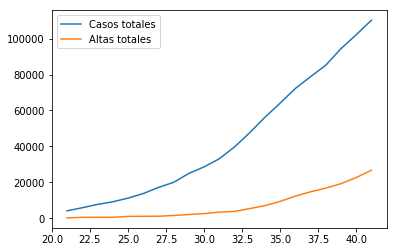

In [11]:
casosTotales = pd.DataFrame(casosTotales)
altasTotales = pd.DataFrame(altasTotales)
totalSpaña = concatDF(casosTotales,altasTotales)
totalSpaña.columns = ["Casos totales","Altas totales"]
totalSpaña.tail(21).plot()

#### NUEVOS CASOS Y ALTAS DIARIOS

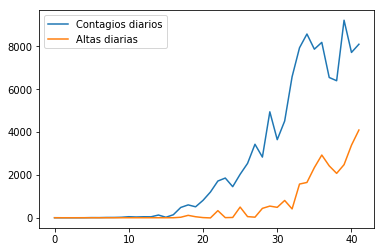

In [12]:
nuevosCasos = pd.DataFrame(nuevosCasos)
nuevasAltas = pd.DataFrame(nuevasAltas)
datosDiarios = concatDF(nuevosCasos,nuevasAltas)
datosDiarios.columns = ["Contagios diarios","Altas diarias"]
datosDiarios.plot()

#### HISTÓRICO
###### Últimos 10 días

In [13]:
totalhistorico.tail(10)

,Casos Totales,Casos diarios,porcentaje,Altas Totales,Altas diarios,porcentaje
32,39673,6584,19.897851,3794,412,12.182141
33,47610,7937,20.006049,5367,1573,41.460200
34,56188,8578,18.017223,7015,1648,30.706167
35,64059,7871,14.008329,9357,2342,33.385602
36,72248,8189,12.783528,12285,2928,31.292081
37,78797,6549,9.064611,14708,2423,19.723240
38,85195,6398,8.119598,16780,2072,14.087571
39,94417,9222,10.824579,19259,2479,14.773540
40,102136,7719,8.175435,22647,3388,17.591775
41,110238,8102,7.932561,26743,4096,18.086281


## Madrid y Cataluña 

### Casos totales

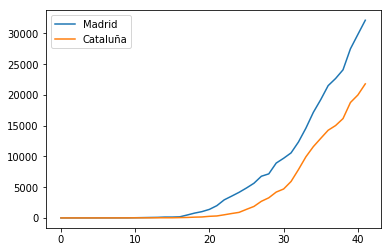

In [14]:
df1 = pd.DataFrame(mdCasos)
df2 = pd.DataFrame(ctCasos)
madCat = concatDF(df1,df2)
madCat.columns =['Madrid','Cataluña']
madCat.plot()

### Casos diarios 

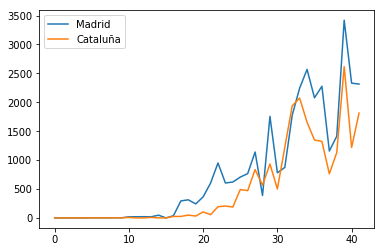

In [15]:
df1 = pd.DataFrame(mdnew)
df2 = pd.DataFrame(ctnew)
madCat = concatDF(df1,df2)
madCat.columns =['Madrid','Cataluña']
madCat.plot()

### Historico Madrid y Cataluña
##### Ultimos 10 días

In [16]:
madCat = concatDF(mdhistorico,cthistorico)
madCat.columns= ['Casos Madrid', 'Diarios Madrid', '% Madrid','Altas Madrid', 'Diarias Madrid', '% Madrid','Casos Cataluña', 'Diarios Cataluña', '% Cataluña','Altas Cataluña', 'Diarias Cataluña', '% Cataluña']
madCat.tail(10)

,Casos Madrid,Diarios Madrid,% Madrid,Altas Madrid,Diarias Madrid,% Madrid,Casos Cataluña,Diarios Cataluña,% Cataluña,Altas Cataluña,Diarias Cataluña,% Cataluña
32,12352,1777,16.803783,2291,228,11.051866,7864,1939,32.725738,728,84,13.043478
33,14597,2245,18.175194,3031,740,32.300306,9937,2073,26.360631,1274,546,75.000000
34,17166,2569,17.599507,3882,851,28.076542,11592,1655,16.654926,1697,423,33.202512
35,19243,2077,12.099499,5044,1162,29.933024,12940,1348,11.628709,2348,651,38.361815
36,21520,2277,11.832874,6326,1282,25.416336,14263,1323,10.224111,3106,758,32.282794
37,22677,1157,5.376394,7491,1165,18.416061,15026,763,5.349506,3455,349,11.236317
38,24090,1413,6.230983,8301,810,10.812976,16157,1131,7.526953,4125,670,19.392185
39,27509,3419,14.192611,9330,1029,12.396097,18773,2616,16.191125,4966,841,20.387879
40,29840,2331,8.473590,10827,1497,16.045016,19991,1218,6.488041,5701,735,14.800644
41,32155,2315,7.758043,12400,1573,14.528494,21804,1813,9.069081,6917,1216,21.329591


# Curvas por CCAA

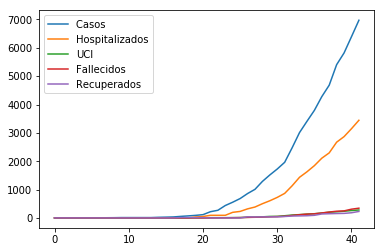

In [17]:
andalucia.plot()

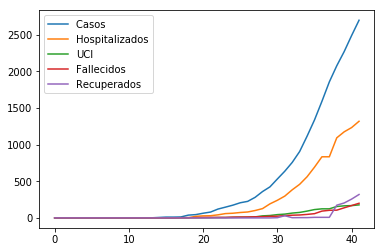

In [18]:
aragon.plot()

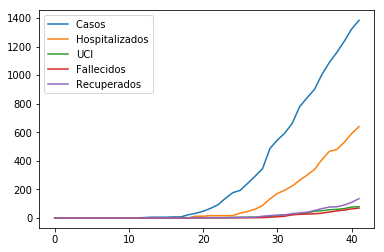

In [19]:
asturias.plot()

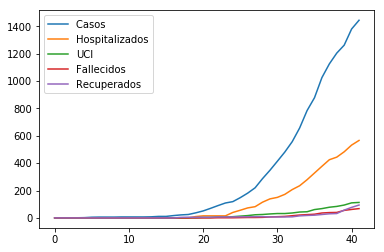

In [20]:
canarias.plot()

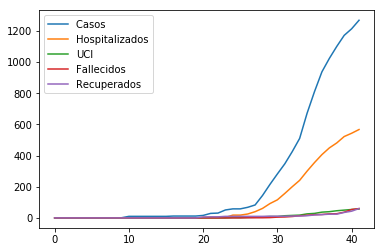

In [21]:
cantabira.plot()

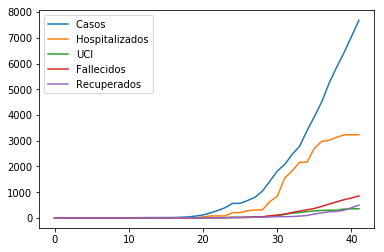

In [22]:
castillaMancha.plot()

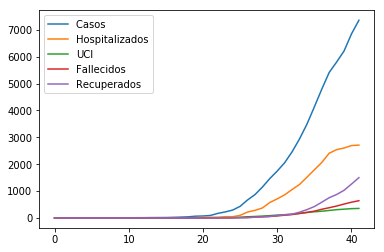

In [23]:
castillaLeon.plot()

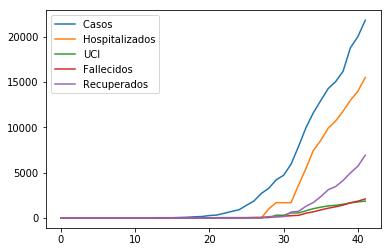

In [24]:
cataluna.plot()

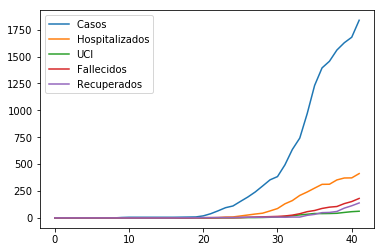

In [25]:
extremadura.plot()

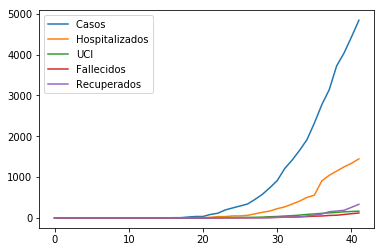

In [26]:
galicia.plot()

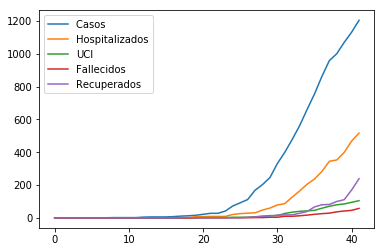

In [27]:
baleares.plot()

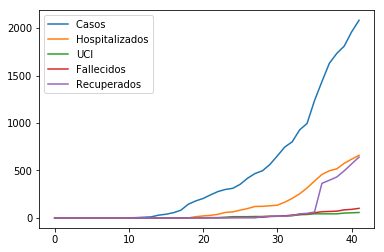

In [28]:
rioja.plot()

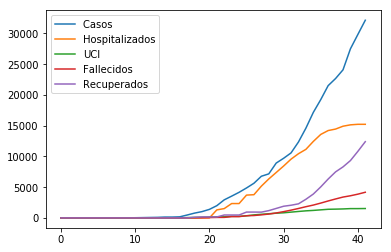

In [29]:
madrid.plot()

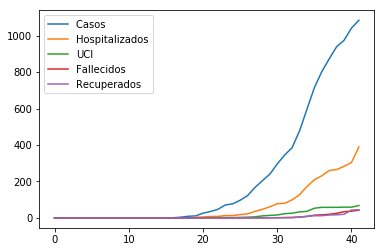

In [30]:
murcia.plot()

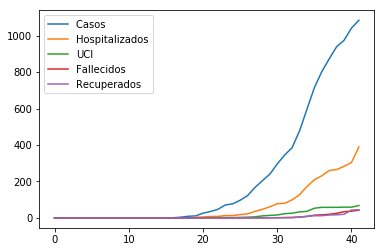

In [31]:
murcia.plot()

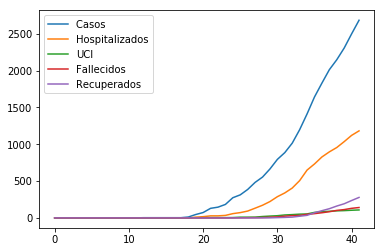

In [32]:
navarra.plot()

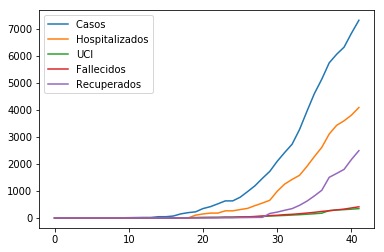

In [33]:
paisVasco.plot()

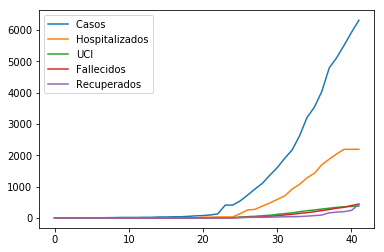

In [34]:
valencia.plot()

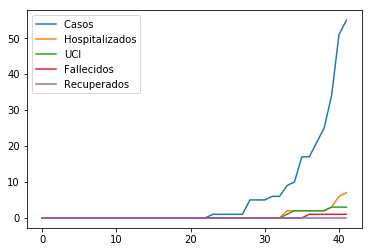

In [35]:
ceuta.plot()

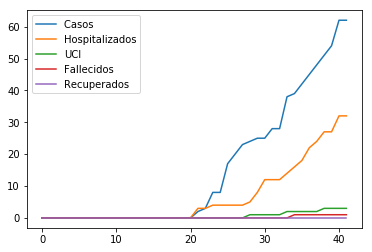

In [36]:
melilla.plot()